# Práctica 3 FAA
___
#### Grupo 1461, pareja 16
#### Alfonso Carvajal y Lucía Asencio
___

## Apartado 1: Esquema de Representacion
___

En esta práctica solo se considera que vamos a clasificar datos nominales y que cada dato pertenece a un espacio de 2 clases.

Para el algoritmo genético programado, se genera primero una población aleatoria de tamaño fijo de cromosomas. Hemos utilizado el enfoque Pittsburgh para el enfoque del Cromosoma, de manera que cada cromosoma es un conjunto de reglas (en nuestro caso, este conjunto puede variar en tamaño de un cromosoma a otro).

### Cromosoma
En nuestro caso un cromosoma es un conjunto de reglas. Cada regla es un conjunto de bits dividido en subconjuntos que representan la parte de la regla para un atributo concreto y el bit de predicción. Para entender la codificación nos remitimos a un ejemplo. Supongamos que un dato tiene 3 atributos y 2 clases. El primer atributo toma 2 valores, el segundo 3 y el tercero 2. Se toman k bits para codificar un atributo de manera que para codificar este atributo tendríamos 2+3+2=7 bits.

Supongamos que:
   * **Atributo 1**: Toma valores {a,b}
   * **Atributo 2**: Toma valores {0,1,2}
   * **Atributo 3**: Toma valores {s,o}

Codificaríamos el dato como xx xxx xx donde 'x' representa un bit.
    
   * **Atributo 1**: 10 representa valor de a
   * **Atributo 1**: 01 representa valor de b
   
   * **Atributo 2**: 100 representa valor de 0
   * **Atributo 2**: 010 representa valor de 1
   * **Atributo 2**: 001 representa valor de 2
    
   * **Atributo 3**: 10 representa valor de s
   * **Atributo 3**: 01 representa valor de o
    
De forma que si el dato fuera a1s su representación sería: 10 010 10
    
Ahora, siguiendo con esta codificación, una regla es un esquema que clasifica. Cada bit de una regla (menos el último) corresponde a un valor particular de un atributo determinado. Así, si una regla tiene un bit a 1, reconocerá a datos que tengan atributo = valor para el atributo y valor correspondiente. Es decir, la regla lo reconocerá bajo su esquema. El último bit es la clase.

   * **Regla 1**: 10 010 10 1 clasifica el dato del ejemplo con un 1
   * **Regla 2**: 10 010 10 0 clasifica el dato del ejemplo con un 0
   * **Regla 3**: 11 010 10 0 clasifica el dato del ejemplo con un 0, pero también clasificaría el dato 01 010 10 con un 0
   * **Regla 4**: 10 111 10 0 clasifica el dato del ejemplo con un 0, pero también clasificaría el dato 10 100 10 con un 0, y también clasificaría el dato 10 001 10 con un 0
   * **Regla 5**: 11 111 11 0 clasificaría cualquier dato con un 0
   * **Regla 6**: 01 010 10 0 no clasifica el dato del ejemplo porque no cumple su esquema

Visto de otra manera, la regla 4 (por ejemplo) reconocerá a datos donde el atributo 1 valga a, el atributo 2 valga 0, 1 o 2 y el atributo 3 valga s, y lo clasificará como 0.
### Detalles de implementación

#### Generación de población inicial
Al principio del entrenamiento se genera una población de individuos de tamaño tamPoblacion (que por defecto es 100). En cuanto al número de reglas por individuo, hemos incluido en la inicialización del Clasificador un parametro llamado maxReglas (por defecto 10) de manera que se puede setear manualmente.  
A cada cromosoma que se crea (`cr.Cromosoma(r.randint(1,self.maxReglas)`) se le asigna un número aleatorio de reglas entre 1 y maxReglas. De esta manera aseguramos algo de variazna en el número de reglas que tienen los individuos de la población.

#### Mecanismo de Cruce implementado
Se ha implementado un cruce en 1 punto y teniendo en consideración que dos individuos pueden tener un número de reglas distinto. Además, para mantener la semántica de las reglas, hemos asegurado que el cruce sea el el mismo punto para ambos individuos.

Ejemplo:

    Cr1 tiene 01 111 11 1  11 010 10 0
    Cr2 tiene 11 001 01 0
    
Y pongamos que el cruce se hace en pos = 4
    
    Cr1 01 11|1 11 1  11 010 10 0
    Cr2 11 00|1 01 0
    
    Cr1' = 11 001 11 1  11 010 10 0
    Cr2' = 01 111 01 0
    
El número pos se elige aleatoriamente entre 0 y la longitud del cromosoma más pequeño
    
#### Mecanismo de Mutación
Se ha implementado el cambio de un bit aleatorio de un individuo.

Ejemplo:

    Cr1 = 11 001 11 1  11 010 10 0
Se elige una posición aleatoria y se cambia un bit

    Cr1' = 11 001 11 0  11 010 10 0
    
#### Mecanismo de clasificación
Se ha implementado un mecanismo por voto. Cada regla del cromosoma clasifica el dato y se suman los votos. El mayor gana. En el caso de que una regla no 'reconozca' un dato, esa regla no participa en la clasificación del mismo. Para el 'reconocimiento' de un dato, se ha utilizado el producto escalar, entendiendo que si una regla 'reconoce' un dato, el resultado de ese producto escalar será el numero de atributos.

Dato: 10 010 10  
Cr1 = 11 011 11 1  11 010 10 0  01 011 11 1  
Producto Escalar:  
11 011 11 . 10 010 10 = 3 = Número de atributos. Por tanto la regla reconoce el dato  
01 011 11 . 10 010 10 = 2 < Número de atributos. Por tanto la regla no reconoce el dato
                    
Clasificación:
   * Regla 1: 11 001 11 1 --> clasifica el dato con un 1
   * Regla 2: 11 010 10 0 --> clasifica el dato con un 0
   * Regla 2: 10 011 11 1 --> clasifica el dato con un 1
    
Por tanto el individuo clasifica ese dato con un 1

##### NOTA
En caso de empate, se clasifica con un valor por defecto. Hemos incluido la opción de utilizar un Prior, que en el entrenamiento obtiene la clase que más aparece. Si la opción usePrior está activada, entonces se clasificará con ese valor en caso de empate.




## Apartado 2: Resultados Clasificación



Para cada fichero, hemos variado el tamaño de la población, el número de generaciones máximo, el número máximo de reglas, los porcentajes que juegan en el elitismo y el cruce y el número de repeticiones de cada prueba. 
Esto se hace a través de la función a continuación definida.

Todos las salidas de las pruebas bajo diferentes parámetros han sido volcadas en un .txt que luego importamos desde una hoja de cálculo para poder analizarlos más fácilmente.  
La hoja de cálculo puede consultarse [aquí](https://docs.google.com/spreadsheets/d/1KEFLPZqcllPsKxqRg4N7S1LZk6B93LXa4TzFXUcG9wM/edit?usp=sharing "Hojas de datos")   
En un principio, los resultados se mostraban también en el notebook, pero eran tantas las pruebas ejecutadas que nuetsros ordenadores no procesaban bien el ipynb, ni cuando exportábamos a html, y no podíamos editar el cuaderno sin que el ordenador se congelara continuamente. Así que, como eníamos los datos volcados en ficheros externos, optamos por eliminar dentro del cuaderno los outputs de las celdas de código del json del cuaderno. De ualqiuer manera, los resultados pueden encontrarse si se desea en los txt y en las hojas de cálculo.

In [5]:
import Datos as d
dics = []
dicc = {'ejemplo1' : './DatasetEjemplo/ejemplo1.data', 'ejemplo2' : './DatasetEjemplo/ejemplo2.data','tic' : './DatasetEjemplo/tic-tac-toe.data'}
for fileName in dicc:
    dataset = d.Datos(dicc[fileName])
    dics.append(dataset.diccionarios)
    print(dataset.diccionarios)


[{'+': 0, '-': 1}, {'+': 0, '-': 1}, {'+': 0, '-': 1}]
[{'+': 0, '-': 1}, {'+': 0, '-': 1}, {'+': 0, '-': 1}]
[{'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'b': 0, 'o': 1, 'x': 2}, {'negative': 0, 'positive': 1}]


In [55]:
#inv_map = {v: k for k, v in my_map.items()}
indiv = [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1
]
dicc = dics[2]
tamregla = sum(len(dic) for dic in dicc[:-1]) + 1
sliced = [indiv[i:i + tamregla] for i in range(0,len(indiv), tamregla)]

cuts = []
suma = 0
for dic in dicc[:-1]:
    suma += len(dic)
    cuts.append(suma)
sliced2 = []
for chunk in sliced:
    sliced2.append([chunk[i : j] for i, j in zip([0] + 
          cuts, cuts + [None])])

inv_map = {v: k for k, v in dicc[0].items()}
print(inv_map)
print(cuts)
print(dicc[0])

{0: 'b', 1: 'o', 2: 'x'}
[3, 6, 9, 12, 15, 18, 21, 24, 27]
{'b': 0, 'o': 1, 'x': 2}


In [1]:
import Datos as d
import numpy as np
import ClasificadorNew as cl
import EstrategiaParticionado as ep


def pruebaGenetica(dicc, porcentajes, tamsPob, gens, maxReglas, pElitismo, pCruce, repeticiones, outFile=None):
    if outFile is None:
        f = open('results.txt', "w")
    else: f = open(outFile, "w")
    cont = 0
    total = len(dicc) * len(porcentajes) * len(tamsPob) * len(gens) * len(maxReglas) * len(pElitismo) * len(pCruce) * repeticiones
    result_matrix = []
    for fileName in dicc:
        dataset = d.Datos(dicc[fileName])
        for prcnt in porcentajes:
            for tam in tamsPob:
                for epoca in gens:
                    for reg in maxReglas:
                        for pe in pElitismo:
                            for pc in pCruce:
                                errors = []
                                mejoresCr = []
                                numGens = []
                                avgFitness = []
                                gen = cl.ClasificadorGenetico(tamPoblacion=tam, nEpocas=epoca, pCruce=pc, pElit=pe, maxReglas=reg, usePrior=True)
                                for i in range(repeticiones):
                                    cont += 1
                                    print("Iteracion ",cont,"/", total)
                                    estrategia = ep.ValidacionSimple(prcnt)
                                    errors.append(gen.validacion(estrategia,dataset,gen))
                                    mejoresCr.append([list(gen.poblacion[-1][0].reglas),gen.poblacion[-1][1]])
                                    numGens.append(gen.currentGen)
                                    avgFitness.append(gen.avgFitness)
                                errorsnp = np.array(errors)
                                numGensnp = np.array(numGens)
                                avgFitnessnp = np.array(avgFitness)

                                mean,std = np.mean(errors), np.std(errors)
                                fitMean = np.mean(avgFitnessnp)
                                gensMean = np.mean(numGensnp)
                                f.write(str([dicc[fileName], prcnt, tam, epoca, reg, pe, pc, gensMean, fitMean, mean, std, mejoresCr]))
                                f.write("\n")
    f.close()




Para el dataset `tic-tac-toe`, que es más grande y converge más lentamente, hemos tenido que restringir las pruebas.
Hemos eliminado la opción de 1 sola regla y, como vimos que la desviación típica de los errores rondaba en torno al 0.02, nos hemos permitido bajar el número de repeticiones a 2 para obtener resultados en tiempos razonables. 

Esta celda ejecuta las pruebas sobre los dataset `ejemplo1` y `ejemplo2` haciendo que los parámetros tomen los valores debajo indicados. A continuación, extraeremos los mejores resultados de la hoja de cálculo correspondiente.

In [2]:
dicc = {'ejemplo1' : './DatasetEjemplo/ejemplo1.data', 'ejemplo2' : './DatasetEjemplo/ejemplo2.data'}
porcentajes = [20, 40, 80]
tamsPob = [100, 200]
gens = [100, 300]
maxReglas = [1, 5, 10, 15, 20]
pElitismo = [0.05, 0.1, 0.15]
pCruce = [0.2, 0.4, 0.6, 0.8, 0.85]
repeticiones = 5

# De la forma implementada, mutación es en función del elitismo y los cruces,
# de manera que hay pMutacion = 1 - pElitismo - pCruce
# La función devuelve una matriz con datos relevantes
#       [dicc[fileName], prcnt, tam, epoca, reg, pe, pc, gensMean, fitMean, mean, std, mejoresCr]
pruebaGenetica(dicc, porcentajes, tamsPob, gens, maxReglas, pElitismo, pCruce, repeticiones, outFile='results_cut.txt')


In [2]:
dicc = dicc = {'tic' : './DatasetEjemplo/tic-tac-toe.data'}
porcentajes = [20]
tamsPob = [100, 200]
gens = [100, 300]
maxReglas = [5, 10, 15, 20]
pElitismo = [0.05, 0.1, 0.15]
pCruce = [0.2, 0.4, 0.6, 0.85]
repeticiones = 2
pruebaGenetica(dicc, porcentajes, tamsPob, gens, maxReglas, pElitismo, pCruce, repeticiones, outFile='res_20.txt')

In [3]:
dicc = dicc = {'tic' : './DatasetEjemplo/tic-tac-toe.data'}
porcentajes = [40]
tamsPob = [100, 200]
gens = [100, 300]
maxReglas = [5, 10, 15, 20]
pElitismo = [0.05, 0.1, 0.15]
pCruce = [0.2, 0.4, 0.6, 0.85]
repeticiones = 2
pruebaGenetica(dicc, porcentajes, tamsPob, gens, maxReglas, pElitismo, pCruce, repeticiones, outFile='res_40.txt')

In [2]:
dicc = dicc = {'tic' : './DatasetEjemplo/tic-tac-toe.data'}
porcentajes = [80]
tamsPob = [100, 200]
gens = [100, 300]
maxReglas = [5, 10, 15, 20]
pElitismo = [0.05, 0.1, 0.15]
pCruce = [0.2, 0.4, 0.6, 0.85]
repeticiones = 2
pruebaGenetica(dicc, porcentajes, tamsPob, gens, maxReglas, pElitismo, pCruce, repeticiones, outFile='res_80.txt')

En documentos con las hojas de cálculo previamente enlazado, hemos volcado los mejores individuos sobre la hoja *Best results*.  
En ésta pueden encontrarse distintas tablas, todas ellas resultado de hacer más o menos la misma query a las hojas que contienen los datos. 

La query particular puede consultarse clicando sobre la esquina superior izquiera de cada tabla de esa hoja, pero la idea es ordenar las filas de cada documento de menor a mayor error medio, luego de menor a mayor std y de menor a mayor fitness medio, y escoger los primeros resultados devueltos.  

En el caso de los ejemplos 1 y 2, el algoritmo genético funcionaba muy bien y hasta cuando nos quedábamos con los 20 mejores resultados, todos ellos tenían error medio 0. Para tictactoe el algoritmo no se ajusta tan bien a los datos.  

Por curiosidad, decidimos ejecutar las pruebas bajo distintos valores para distintos tamaños del conjunto de test, variando entre el 20 (más usado), el 40 o el 80 (a priori, sin mucha lógica) por ciento de la población.  
En los ejemplos 1 y 2 la query busca el mejor individuo sin tener en cuenta este porcentaje, pero para tictactoe hemos extraido el mejor individuo devuelto después de usar cada porcentaje.

En primer lugar analizaremos el mejor individuo de cada dataset, y después la semántica de estos individuos en un apartado distinto.

#### Ejemplo 1
____
El individuo en cuestión tiene un error medio de 0%, y una desviación típica de 0.  
Fue ejecutado con una población de tamaño 100 y, aunque el número máximo de generaciones era 100, se paró en media con menos de 3 generaciones. Usamos el 15% como elitismo, y el 60% para cruce, y su fitness fue del 100%.   
El número máximo de reglas que permitimos fue 10, y el porcentaje usado para test fue muy alto, del 80%.   
Éste es el cromosoma correspondiente, formado por 5 reglas:   
[[0, 1, 0, 0, 0, 1], [0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], 1.0]

#### Ejemplo 2
____
De nuevo, el individuo tiene un error medio de 0%, y una desviación típica de 0.  
El porcentaje de datos usados para test fue el 80%, y la población (a diferencia de en los demás casos) fue de tamaño 100. El máximo de generaciones permitido fue 300, y sorprendentemente en este caso el error cero se alcanzó imponiendo un número máximo de reglas de 1. El elitismo y el cruce varían un poco con respecto a lo anterior, en este caso se usó 0.1 y 0.85 respectivamente, el fitness medio de la población fue del 55% y el fitness del individuo ganador del 100%.
Éste es el cromosoma correspondiente, formado por 1 reglas:   
[[0, 1, 1, 1, 1], 1.0]

Como en estos datos el error 0 se consigue en muchas ocasiones y el valor de los hiperparámetros varía mucho entre los distintos buenos individuos, no podemos decir claramente 'tal hiperparámetro debería tomar tal valor para obtener resultados óptimos'.

#### Tictactoe
___
El individuo con menor error en estos datos tiene un 10% de error, con un fitness medio alto, del 86%. El fitness del individuo en cuestión fue del 89%   
Fue ejecutado con un 20% de los datos usados para test, con una población de tamaño 200 y número máximo de generaciones 300. Se llegaron a las 270 de media. El elitismo era únicamente del 10%, y el cruce, bastante alto, del 40%.
Este era el individuo:  
[[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 0.8904823989569752]


En este caso, sin importar el tamaño de los datos de test, los resultados parecen estar de acuerdo en que la salida óptima se obtenía con una población de 200 y 300 generaciones como máximo (y en casi todos los ejemplos se converge después de las 100 generaciones), así como un número alto de reglas (15-20 en la mayoría de los mejores individuos). El porcentaje ideal usado para cruce estaba en torno al 50%, y el elitismo bajo.  


El error medio al usar un 80% como test asciende al 20% que, aunque más alto que usando un 20%, es un error bastante menor que el que esperábamos. A cambio, las pruebas con un 80% de test convergían antes que las del 20% o 40%, en torno a las 100 generaciones.

#### Semántica
___
¿En qué clasificaciones se traducen estos individuos? Para analizarlo, usamos la función decodificadora abajo implementada, que ejecutamos con nuestros tres mejores individuos.

In [99]:
import numpy as np
import Datos as d

def decode(indiv, dicc):
    tamregla = sum(len(dic) for dic in dicc[:-1]) + 1
    sliced = [indiv[i:i + tamregla] for i in range(0,len(indiv), tamregla)]
    cuts = []
    suma = 0
    for dic in dicc[:-1]:
        suma += len(dic)
        cuts.append(suma)
    sliced2 = []
    for chunk in sliced:
        sliced2.append([chunk[i : j] for i, j in zip([0] + 
              cuts, cuts + [None])])
    inv_maps = [{v: k for k, v in dic.items()} for dic in dicc]
    decod_indiv = []
    for rule in sliced2:
        decod_rule = []
        length = len(rule)
        for (attr, dic, j) in list(zip(rule,inv_maps, range(length))):
            decod_attr = []
            if j == length -1:
                decod_attr.append(dic[attr[0]])
            else:
                for i in range(len(attr)):
                    if attr[i] == 1:
                        decod_attr.append(dic[i])
            decod_rule.append(decod_attr)
        decod_indiv.append(decod_rule)
    return decod_indiv


dics = []
dicc = {'ejemplo1' : './DatasetEjemplo/ejemplo1.data', 'ejemplo2' : './DatasetEjemplo/ejemplo2.data','tic' : './DatasetEjemplo/tic-tac-toe.data'}
for fileName in dicc:
    dataset = d.Datos(dicc[fileName])
    dics.append(dataset.diccionarios)
indiv1 = [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
indiv2 = [0, 1, 1, 1, 1]
indiv3 = [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1
]
indivs = [indiv1, indiv2, indiv3]
 
decod_indivs = []
for (dicc, indiv) in list(zip(dics, indivs)):
    dec = decode(indiv, dicc)
    decod_indivs.append(dec)

**Ejemplo 1**

In [102]:
print(len(decod_indivs[0]))
print(decod_indivs[0])

6
[[['-'], [], ['+']], [['+'], ['+'], ['-']], [['-'], ['+'], ['+']], [['+'], ['+', '-'], ['+']], [[], ['+'], ['+']], [[], ['-'], ['+']]]


Este cromosoma está formado por 6 reglas, que clasifican de la siguiente manera:
1. La regla 1 reconoce como + a los individuos con un - en el primer atributo, aunque no saltará para ningún valor del segundo atributo.
2. La regla 2 reconoce como - a los individuos como un + en ambos atributos
3. La regla 3 reconoce como + a los individuos con un - en el primer atributo y un + en el segundo
4. El atributo 4 reconoce como + a los individuos con un + en el primer atributo y un + o un - en el segubdo
5. La regla 5 no saltá ante el primer atributo, pero reconoce como + a aquellos individuos con segundo atributo +
6. Igual que la quinta pero con un - en el segundo atributo

**Ejemplo 2**

In [104]:
print(len(decod_indivs[1]))
print(decod_indivs[1])

1
[[['-'], ['+', '-'], ['-']]]


Este cromosoma está formado por 1 reglas, que clasifican de la siguiente manera:
Si un individuo tiene un - en el primer atributo, y un + o un - en el segundo, lo reconoce como -

**Ejemplo 3**

In [106]:
print(len(decod_indivs[2]))
print(decod_indivs[2])

19
[[['b', 'o'], ['o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['negative']], [['b', 'o', 'x'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'o', 'x'], ['b', 'o', 'x'], ['negative']], [['b', 'o'], ['b', 'o'], [], ['b', 'o'], ['b'], ['b'], ['b', 'o'], ['o'], ['b'], ['negative']], [['b', 'x'], ['b', 'x'], ['b', 'o'], ['o', 'x'], ['b', 'o'], ['b', 'o'], ['o'], ['b'], ['b', 'o'], ['negative']], [['o', 'x'], ['b', 'o'], ['o', 'x'], ['b', 'o', 'x'], [], [], ['o', 'x'], ['o'], ['o', 'x'], ['negative']], [['x'], ['b', 'x'], ['b', 'o', 'x'], ['o'], ['b', 'o', 'x'], ['b', 'o'], ['b', 'x'], [], [], ['positive']], [['b', 'o', 'x'], ['o'], ['b', 'o', 'x'], ['b', 'o', 'x'], ['o'], ['b', 'o', 'x'], ['b', 'o', 'x'], ['o'], ['b', 'o', 'x'], ['negative']], [[], ['b', 'o', 'x'], [], ['b', 'x'], [], [], ['o'], [], ['x'], ['negative']], [['b', 'o', 'x'], ['b', 'o', 'x'], ['o'], ['b', 'o', '

Este cromosoma está formado por 19 reglas. Como son demasiadas, analizaremos sólo la primera, pero las defdmás se interpretan de forma análoga:
1. La primera regla reconoce como negative a aquellos individuos donde
    * El primer atributo valga b u o
    * El segundo valga o o x
    * El tercero valga b u o
    * El cuarto valga o, b o x
    * El quinto valga o, b o x
    * El sexto valga b u o
    * El septimo o, b o x
    * El octavo valo b u o
    * El noveno vale o, b o x

### Apartado 3: Analisis de los resultados



### Apartado 3: Analisis de los hiperparámetros

Ya que teníamos todos los resultados importados en una hoja de cálculo, hemos decidido usarla como herramienta para visualizar la importancia de cada hiperparámetro del algoritmo.  Ya que los resultados en `ejemplo1` y `ejemplo2` eran tan perfectos, optamos por hacer este análisis sobre `tictactoe`, con la idea de obtener conclusiones un poco más realistas.
   
Hemos ido representando el error medio con respecto a cada uno de los hiperparámetros, para poder decidir así cuáles afectaban a la precisión de la predicción, y cuáles no.  

En la siguiente imagen se refleja cómo evolucionaba el error a medida que crecía el número medio de generaciones a las que se llegaba. Como era de esperar, el error baja a medida que las generaciones aumentan. Aunque esto nos inclinaría a pensar que debemos marcar un número de generaciones alto, el gráfico no refleja, que el tiempo de entrenamiento crece notablemente a medida que sube el número de generaciones.
![NGeneraciones vs error medio](https://github.com/luciaasen/FAA/blob/master/p3/images/Error%20medio%20frente%20a%20NGeneraciones%20media.png?raw=true)
Los demás parámetros no han parecido ser cruciales en el error del algoritmo. Vemos que para cualquier tamaño de población, cualquier porcentaje de elitismo, cualquier porcentaje de mutacion y sea cual sea el número de reglas, el error medio se mantiene de manera invariante entre 0.1 y 0.3

Sólo para el tamaño de la población, el error parece ser ligeramente menor para el tamaño grande. 
![Cruce vs error medio](https://github.com/luciaasen/FAA/blob/master/p3/images/Cruce%20frente%20a%20Error%20medio.png?raw=true)
![Elitismo vs error medio](https://github.com/luciaasen/FAA/blob/master/p3/images/Elitismo%20frente%20a%20Error%20medio.png?raw=true)
![Max reglas vs error medio](https://github.com/luciaasen/FAA/blob/master/p3/images/Num%20max%20de%20reglas%20frente%20a%20Error%20medio.png?raw=true)
![Tam poblacion vs error medio](https://github.com/luciaasen/FAA/blob/master/p3/images/_Tam%20poblaci%C3%B3n%20frente%20Error%20medio.png?raw=true)


### Apartado 4: Análisis de entrenamiento
#### Evolución del fitness del mejor individuo durante la fase de entrenamiento

Para este apartado hemos implementado una función que realiza un entrenamiento guardando a lo largo del mismo, los datos acerca del mejor fitness y el medio, datos que son graficados y analizados un par de celdas más abajo.

In [21]:
def graphTraining(fileName, prcnt, tam, epoca, pc, pe, reg):
    dataset = d.Datos(fileName)
    estrategia = ep.ValidacionSimple(prcnt)
    listaParticiones = estrategia.creaParticiones(dataset.datos, 1)
    trainData = dataset.extraeDatos(estrategia.listaParticiones[0].indicesTrain)
    gen = cl.ClasificadorGenetico(tamPoblacion=tam, nEpocas=epoca, pCruce=pc, pElit=pe, maxReglas=reg, usePrior=True)
    gen.entrenamiento(trainData, dataset.nominalAtributos, dataset.diccionarios)
    return gen.topFitnessHistory, gen.avgFitnessHistory

    

In [24]:
filename = './DatasetEjemplo/tic-tac-toe.data'
# prcnt = 80
# tamsPob = [100, 200]
# gens = [100, 300]
# maxReglas = 15
# pElitismo = 0.05
# pCruce = 0.85

best, avg = graphTraining(filename, prcnt=80, tam=100, epoca=100, pc=0.85, pe=0.05, reg=15)




Gen  1 / 100 - BEST FITNESS:  0.7083333333333334  AVG FITNESS:  0.695208333333333
Gen  2 / 100 - BEST FITNESS:  0.7083333333333334  AVG FITNESS:  0.6948437499999995
Gen  3 / 100 - BEST FITNESS:  0.7083333333333334  AVG FITNESS:  0.6964583333333327
Gen  4 / 100 - BEST FITNESS:  0.71875  AVG FITNESS:  0.6974999999999997
Gen  5 / 100 - BEST FITNESS:  0.71875  AVG FITNESS:  0.6995312499999996
Gen  6 / 100 - BEST FITNESS:  0.71875  AVG FITNESS:  0.7003645833333332
Gen  7 / 100 - BEST FITNESS:  0.71875  AVG FITNESS:  0.6999479166666663
Gen  8 / 100 - BEST FITNESS:  0.71875  AVG FITNESS:  0.7011458333333332
Gen  9 / 100 - BEST FITNESS:  0.7239583333333334  AVG FITNESS:  0.7018229166666664
Gen  10 / 100 - BEST FITNESS:  0.7239583333333334  AVG FITNESS:  0.7034375
Gen  11 / 100 - BEST FITNESS:  0.7239583333333334  AVG FITNESS:  0.7057812500000002
Gen  12 / 100 - BEST FITNESS:  0.7239583333333334  AVG FITNESS:  0.7060416666666667
Gen  13 / 100 - BEST FITNESS:  0.7239583333333334  AVG FITNESS:  0

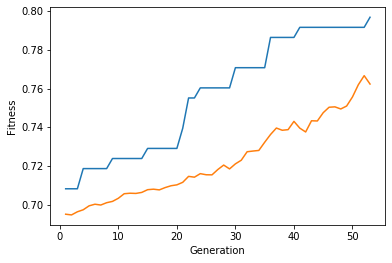

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(best) + 1), best)
plt.plot(range(1,len(avg) + 1), avg)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()


La línea superior corresponde, lógicamente, al mejor fitness. A medida que el número de generaciones aumenta, ambos valores crecen. Tiene sentido que crezcan, ya que en teoría la precisión del clasificador va mejorando generación a generación. Por otro lado, no es tan obvio pero parece cumplirse, que el fitness medio y el mejor crecen de manera más o menos parecida con el tiempo